In [7]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import matplotlib.animation as animation
import json
import scipy
import os
from sklearn.mixture import GaussianMixture

import discrete_CRISPR_methods as ds
import discrete_CRISPR_sim_methods as ds2

foldername = '/media/homes/thisiszhi/code/data/ParamsSweepNpNoCtrl/'
x_variable = "Np"

In [8]:
def load_stuff(frame_cut):
    params = json.load(open("_params.json"))
    sim_params = json.load(open("_sim_params.json"))
    try:
        frames_f = np.load("frames_f.npy")[frame_cut:]
        frames_n = np.load("frames_n.npy")[frame_cut:]
        frames_nh = np.load("frames_nh.npy")[frame_cut:]

    except IndexError:
        frames_f = np.load("frames_f.npy")
        frames_n = np.load("frames_n.npy")
        frames_nh = np.load("frames_nh.npy")
    return params, sim_params, frames_f, frames_n, frames_nh

In [9]:
subfolders = [ f.path for f in os.scandir(foldername) if f.is_dir() ]


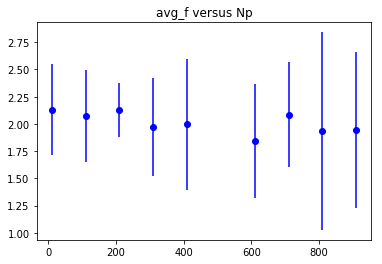

In [10]:
y_variable = "avg_f"
y_variable_err = "var_f"

y = []
y_err = []
x = []

for current_folder in subfolders:
    os.chdir(current_folder)

    results = json.load(open("_results.json"))
    params = json.load(open("_params.json"))

    y.append(results[y_variable])
    y_err.append(results[y_variable_err])
    x.append(params[x_variable])

plt.figure()
plt.title(y_variable + " versus " + x_variable)
# plt.scatter(x, y, color = "k")
plt.errorbar(x, y, y_err, color = "b", fmt = "o")

os.chdir(foldername)
plt.savefig(y_variable + ".png")

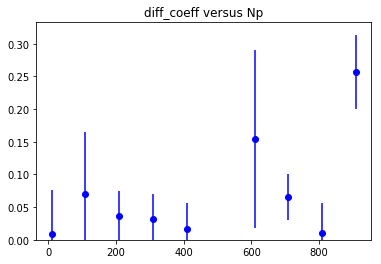

In [14]:
y_variable = "diff_coeff"
y_variable_err = "var_diff_coeff"

y = []
y_err = []
x = []

for current_folder in subfolders:
    os.chdir(current_folder)

    results = json.load(open("_results.json"))
    params = json.load(open("_params.json"))

    y.append(results[y_variable])
    y_err.append(results[y_variable_err])
    x.append(params[x_variable])

plt.figure()
plt.title(y_variable + " versus " + x_variable)
# plt.scatter(x, y, color = "k")
plt.errorbar(x, y, np.sqrt(y_err)/100, color = "b", fmt = "o")
plt.ylim(bottom = 0)

os.chdir(foldername)
plt.savefig(y_variable + ".png")

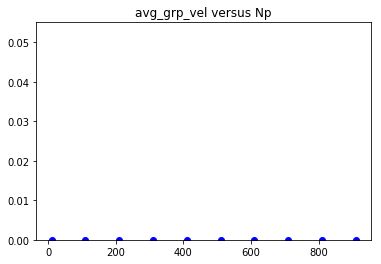

In [12]:
y_variable = "avg_grp_vel"
y_variable_err = "var_grp_vel"

y = []
y_err = []
x = []

for current_folder in subfolders:
    os.chdir(current_folder)

    results = json.load(open("_results.json"))
    params = json.load(open("_params.json"))

    y.append(results[y_variable])
    y_err.append(results[y_variable_err])
    x.append(params[x_variable])

plt.figure()
plt.title(y_variable + " versus " + x_variable)
# plt.scatter(x, y, color = "k")
plt.errorbar(x, y, np.sqrt(y_err)/10, color = "b", fmt = "o")
plt.ylim(bottom=0)

os.chdir(foldername)
plt.savefig(y_variable + ".png")